# State of the Problem 4: Significant relationship between meteorological, environmental, and urbanization factors and the SEIR-SEI model’s forecasting performance

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [59]:
def analyze_correlation(dengue_data, factors_data):
    """
    Performs correlation analysis between dengue cases/forecasts and given factors.
    """
    # Merge the dataframes on the 'Day' column
    df_merged = pd.merge(dengue_data, factors_data, on='Day', how='inner')
    
    results = []
    
    dengue_vars = ['Actual_Cases', 'Forecast_Cases']
    factor_vars = [col for col in factors_data.columns if col != 'Day']
    
    for d_var in dengue_vars:
        for f_var in factor_vars:
            try:
                # Calculate Pearson correlation coefficient and p-value
                # This will raise a warning if the data is constant
                r, p_value = stats.pearsonr(df_merged[d_var], df_merged[f_var])
                
                # Append the results if the calculation is successful
                results.append({
                    'Dengue Data': d_var,
                    'Factor': f_var,
                    'Pearson r': r,
                    'p-value': p_value
                })
                
                # Create a scatter plot with a trendline
                plt.figure(figsize=(8, 6))
                sns.regplot(x=f_var, y=d_var, data=df_merged)
                plt.title(f'Scatter Plot: {d_var} vs. {f_var}')
                plt.xlabel(f_var)
                plt.ylabel(d_var)
                plt.grid(True)
                plt.show()

            except ValueError:
                # If a ValueError is raised (often due to constant input),
                # record NaN for the correlation and p-value.
                results.append({
                    'Dengue Data': d_var,
                    'Factor': f_var,
                    'Pearson r': np.nan,
                    'p-value': np.nan
                })
                print(f"Warning: Data for {f_var} is constant. Correlation is not defined.")
                continue # Skip plotting for this pair
    
    results_df = pd.DataFrame(results)
    return results_df

In [60]:
def aggregate_daily_to_monthly(daily_data):
    """Converts a 365-Day daily array to a 12-item Dayly sum array."""
    # List of Days in each Day for a non-leap year
    Days_in_each_Day = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    
    data = []
    current_Day = 0
    for Days in Days_in_each_Day:
        # Sums the daily cases for the correct number of Days for each Day
        Day_sum = np.sum(daily_data[current_Day : current_Day + Days])
        data.append(Day_sum)
        current_Day += Days
        
    return np.array(data)

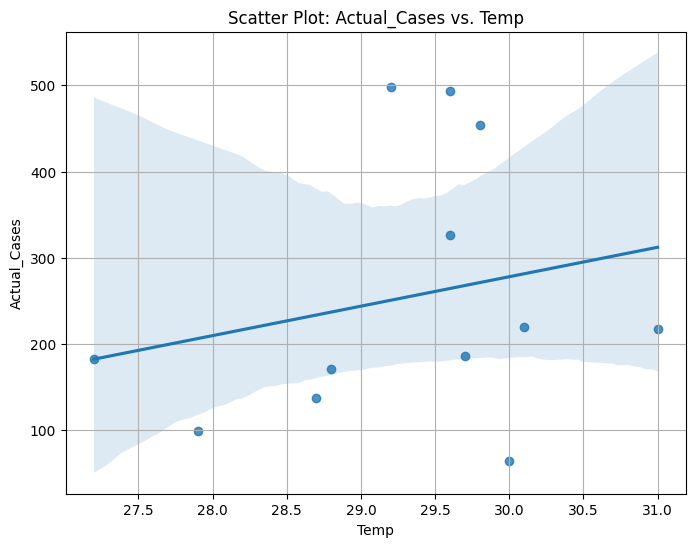

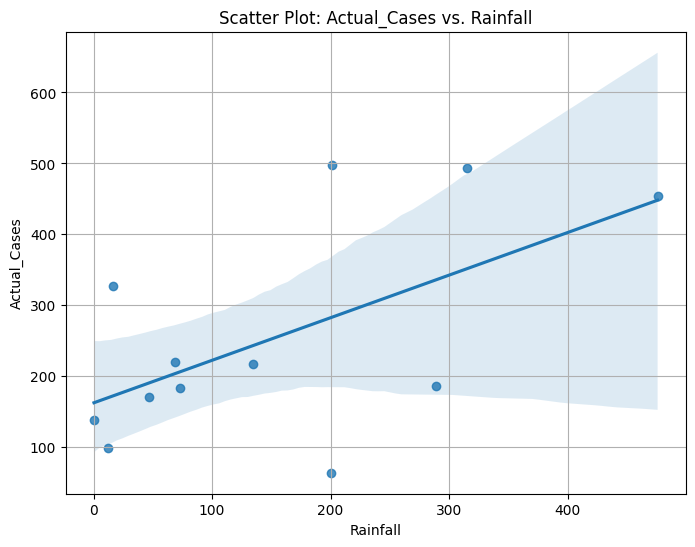

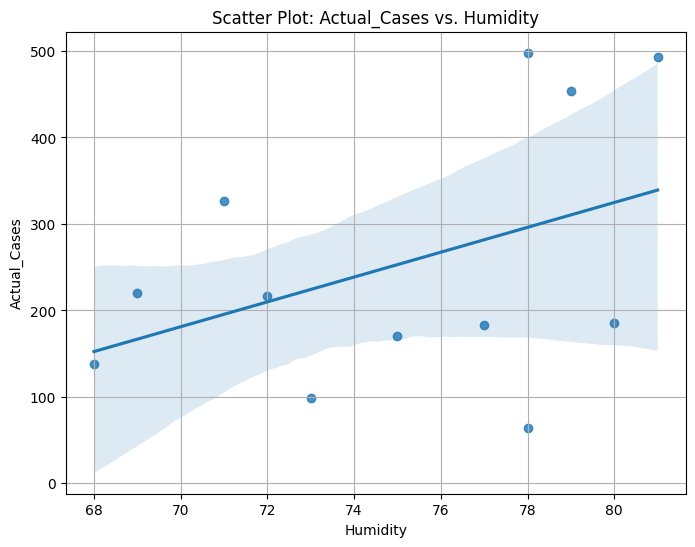

C:\Users\Admin\AppData\Local\Temp\ipykernel_16360\3561183531.py:18: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p_value = stats.pearsonr(df_merged[d_var], df_merged[f_var])


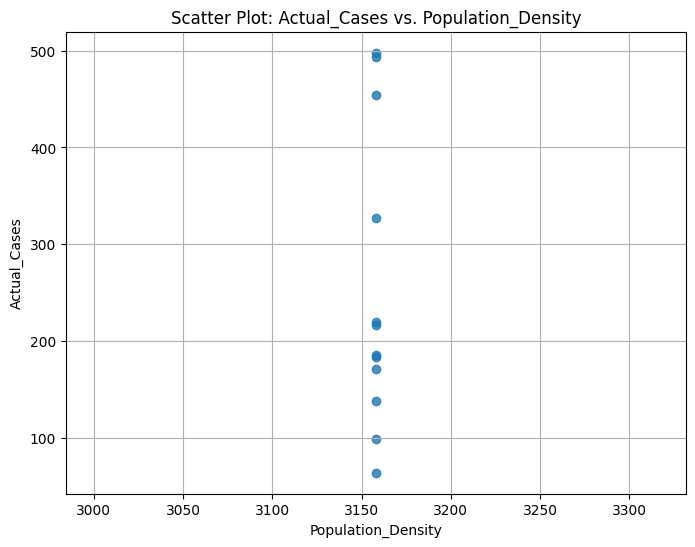

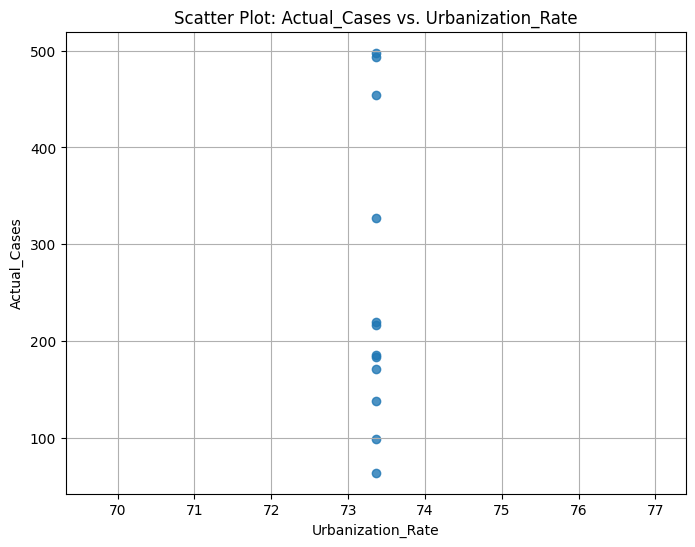

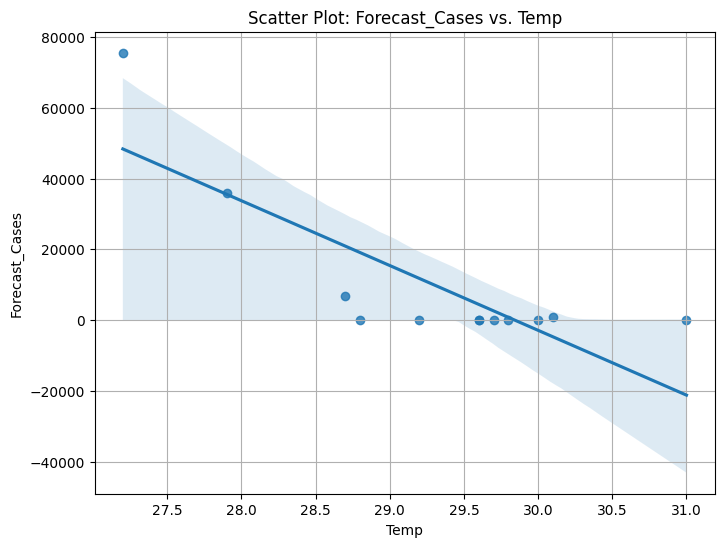

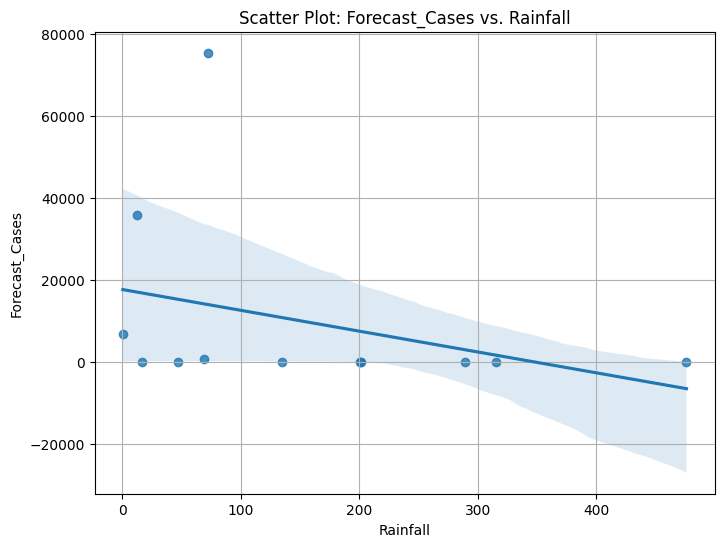

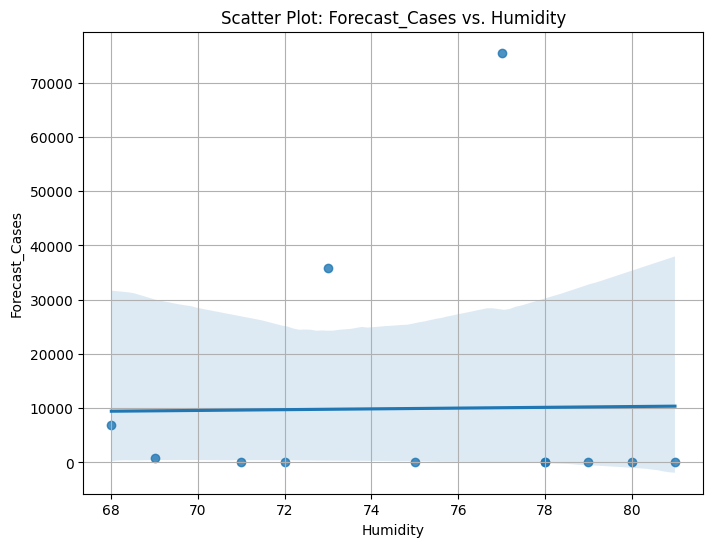

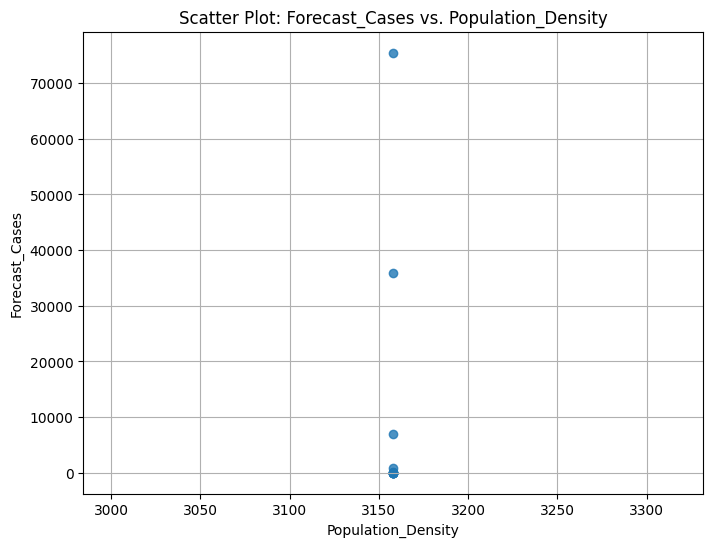

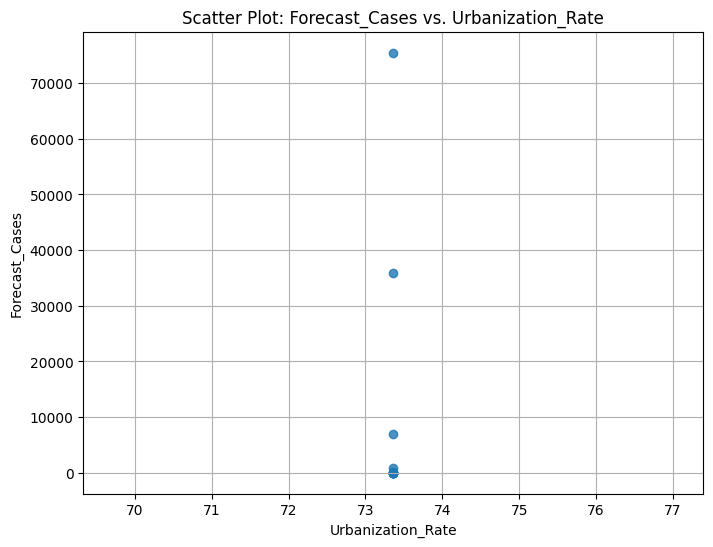

Correlation Analysis Results:
      Dengue Data              Factor  Pearson r   p-value
0    Actual_Cases                Temp   0.230466  0.471131
1    Actual_Cases            Rainfall   0.583567  0.046375
2    Actual_Cases            Humidity   0.415416  0.179283
3    Actual_Cases  Population_Density        NaN       NaN
4    Actual_Cases   Urbanization_Rate        NaN       NaN
5  Forecast_Cases                Temp  -0.814135  0.001267
6  Forecast_Cases            Rainfall  -0.326050  0.301003
7  Forecast_Cases            Humidity   0.013642  0.966435
8  Forecast_Cases  Population_Density        NaN       NaN
9  Forecast_Cases   Urbanization_Rate        NaN       NaN


In [61]:
forecast_cases = pd.read_csv('SEIR-SEI.csv')
forecast_cases = aggregate_daily_to_monthly(forecast_cases['Ih'])
actual_cases = pd.read_csv('2023_cases_x_larvae.csv')

dengue_data = pd.DataFrame({
    'Day': np.arange(1, 13),
    'Actual_Cases': np.random.randint(50, 500, 12),
    'Forecast_Cases': forecast_cases
})

# Example Factors Data
factors_data = pd.DataFrame({
    'Day': np.arange(1, 13),
    'Temp': actual_cases['TMEAN'],
    'Rainfall': actual_cases['RAINFALL'],
    'Humidity': actual_cases['RH'],
    'Population_Density': actual_cases['Population_Density'],
    'Urbanization_Rate': actual_cases['Urbanization_Rate']
})

# Call the function to perform the analysis
correlation_results = analyze_correlation(dengue_data, factors_data)

# Print the results table
print("Correlation Analysis Results:")
print(correlation_results)